# Data Preparation

In [1]:
from helpers.helper_functions import read_and_set_df, set_datatypes, get_plotly_colors, pd, np, msno, make_subplots, go, plt, sns, train_test_split, LinearRegression, IterativeImputer, KNNImputer, OneHotEncoder, LabelEncoder, make_pipeline, StandardScaler, LogisticRegression, KFold, cross_val_score, SVR, mse, ff, resample, px, SMOTE, plot_2d_space

In [2]:
df = read_and_set_df('data/train.csv', train=False)

set_datatypes(df)

df.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,No,28.0,No,> 2 Years,Yes,40454,26,217,yes
1,2,Male,76,No,3.0,No,1-2 Year,No,33536,26,183,no
2,3,Male,47,No,28.0,No,> 2 Years,Yes,38294,26,27,yes
3,4,Male,21,Yes,11.0,Yes,< 1 Year,No,28619,152,203,no
4,5,Female,29,Yes,41.0,Yes,< 1 Year,No,27496,152,39,no


In [3]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,380999.0,NaN,NaN,NaN,190500.0,109985.081943,1.0,95250.5,190500.0,285749.5,380999.0
gender,379948,2,Male,205447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,370107.0,NaN,NaN,NaN,38.852091,15.63218,20.0,25.0,36.0,49.0,205.0
driving_license,380948,2,No,206635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_code,380999.0,53.0,28.0,106372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previously_insured,380948,2,No,206635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_age,380948,3,1-2 Year,200228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicle_damage,380948,2,Yes,192328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_premium,380999.0,NaN,NaN,NaN,30527.70069,17242.997675,-9997.0,24371.0,31656.0,39390.0,540165.0
policy_sales_channel,380999.0,NaN,NaN,NaN,112.035331,54.203334,1.0,29.0,133.0,152.0,163.0


## Missing Values

Die Funktion `heatmap()` von `missingno` misst die Nullkorrelation: wie stark das Vorhandensein oder Fehlen einer Variable das Vorhandensein einer anderen Variable beeinflusst.

Die Nullkorrelation reicht von -1 (wenn eine Variable auftritt, tritt die andere definitiv nicht auf) über 0 (auftauchende oder nicht auftauchende Variablen haben keinen Einfluss aufeinander) bis 1 (wenn eine Variable auftritt, tritt die andere definitiv auf).


### Verteilung der Missing Values 

<AxesSubplot:>

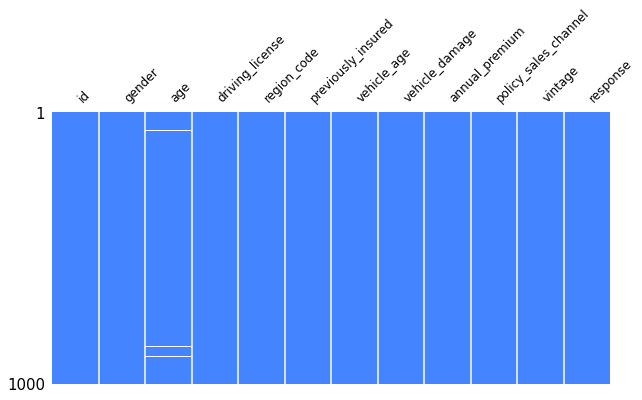

In [4]:
# Verteilung der Missing Values innerhalb der Variablen 
msno.matrix(df.sample(1000), sparkline=False, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0))

<AxesSubplot:>

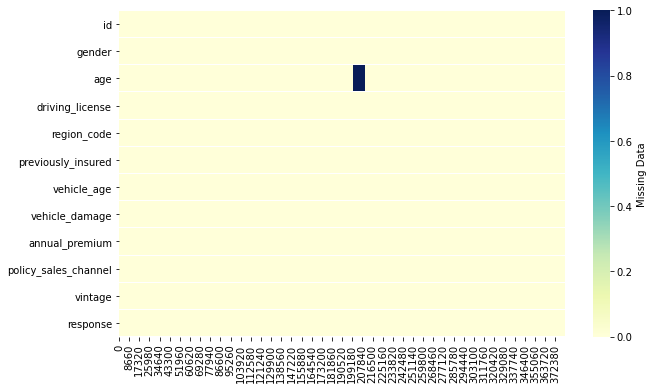

In [5]:

plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})


<AxesSubplot:>

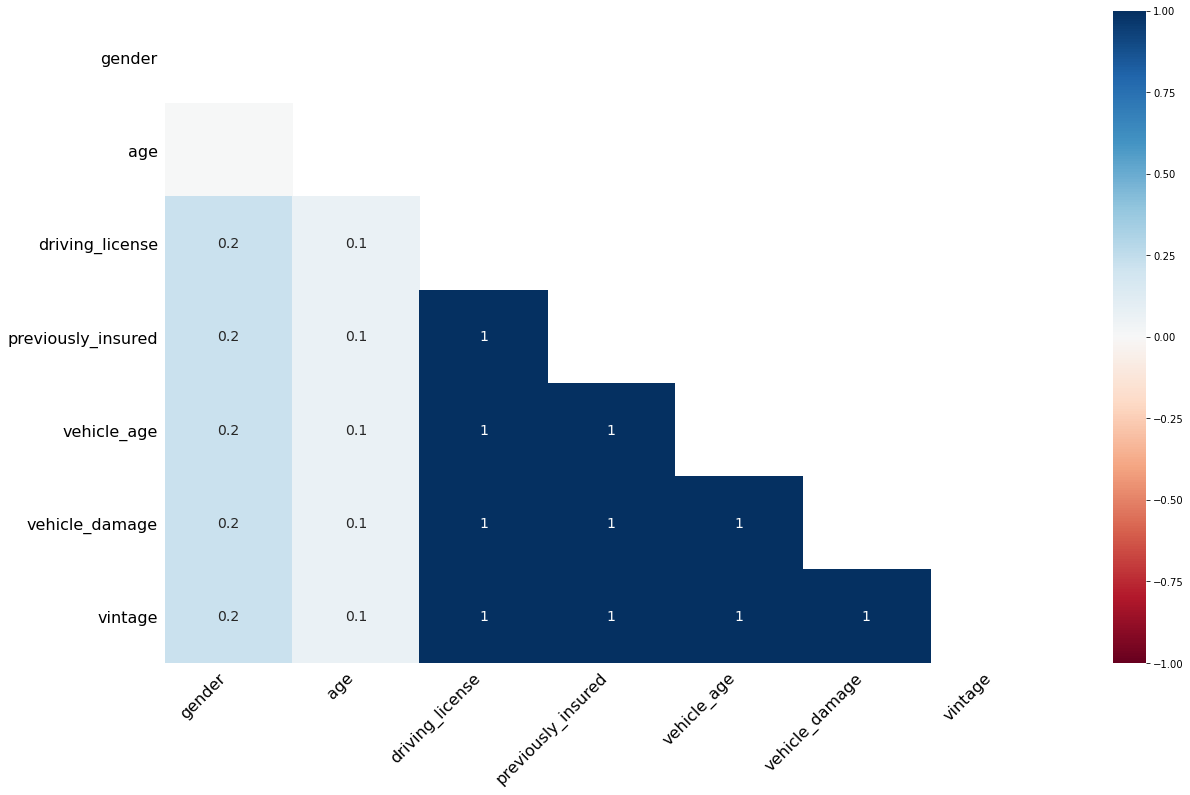

In [6]:
# Visualize the correlation between the number of
# missing values in different columns as a heatmap
msno.heatmap(df)



Um dieses Diagramm zu interpretieren, lesen Sie es aus einer Top-Down-Perspektive. Clusterblätter, die in einem Abstand von Null miteinander verbunden sind, sagen das Vorhandensein des jeweils anderen vollständig voraus - eine Variable könnte immer leer sein, wenn eine andere gefüllt ist, oder sie könnten immer beide gefüllt oder beide leer sein, und so weiter. In diesem speziellen Beispiel klebt das Dendrogramm die Variablen zusammen, die erforderlich und daher in jedem Datensatz vorhanden sind.

Clusterblätter, die sich in der Nähe von Null aufspalten, aber nicht bei Null, sagen sich gegenseitig sehr gut, aber immer noch unvollkommen voraus. Wenn Ihre eigene Interpretation des Datensatzes darin besteht, dass diese Spalten tatsächlich in Null übereinstimmen oder übereinstimmen sollten (z. B. als BETEILIGUNGSFAKTOR FAHRZEUG 2 und FAHRZEUG-TYPCODE 2), dann sagt Ihnen die Höhe des Clusterblatts in absoluten Zahlen, wie oft die Datensätze "nicht übereinstimmen" oder falsch abgelegt sind - d. h. wie viele Werte Sie ausfüllen oder streichen müssten, wenn Sie dazu geneigt sind.

Beschreibung: 
Das Dendrogramm verwendet einen hierarchischen Clustering-Algorithmus, um die Variablen anhand ihrer Nullkorrelation gegeneinander abzugrenzen. 


Erklärung: 
Clutster, die sich in bei Null aufspalten, sagen sich untereinander vollkommen voraus (Korrelation von 1). Auf Grundlage 

Auf jeder Stufe des Baums werden die Variablen auf der Grundlage der Kombination aufgeteilt, die den Abstand der verbleibenden Cluster minimiert.  

Je monotoner die Variablen sind, desto näher liegt ihr Gesamtabstand bei Null und desto näher liegt ihr durchschnittlicher Abstand (die y-Achse) bei Null.   

<AxesSubplot:>

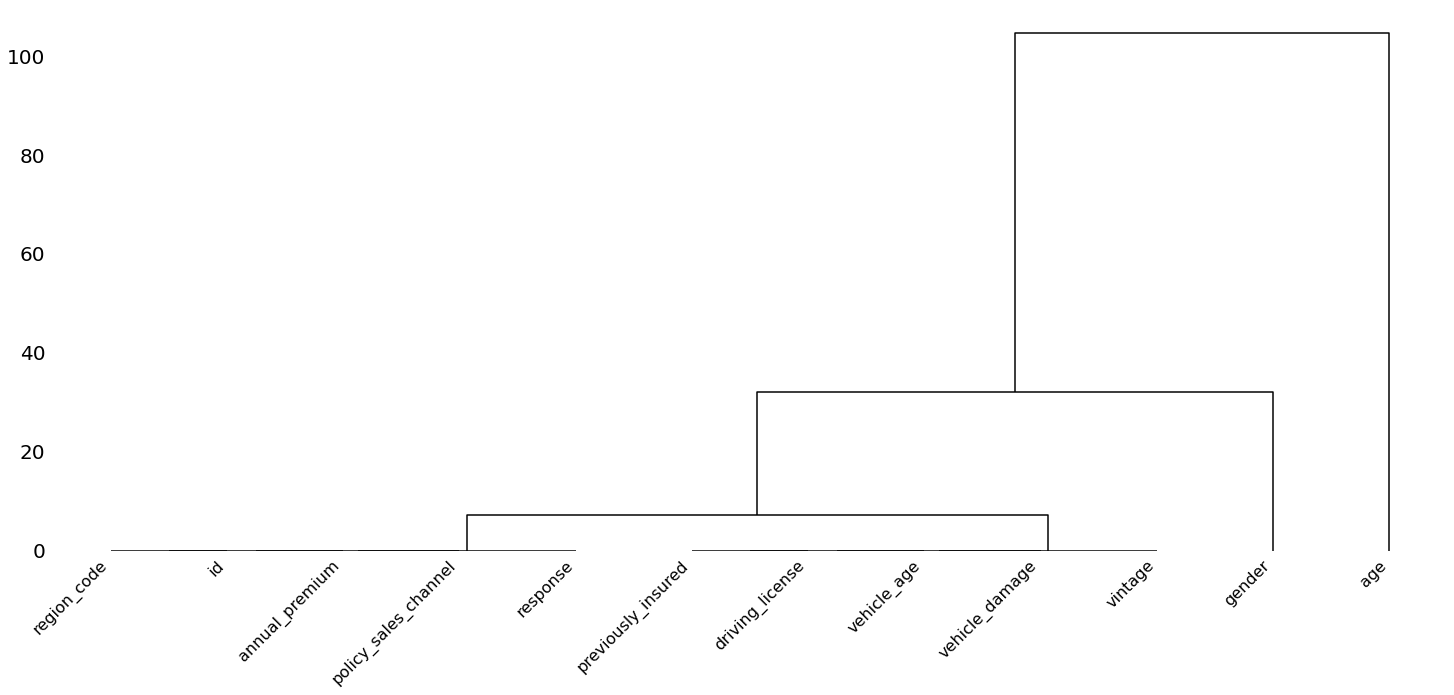

In [7]:
msno.dendrogram(df, orientation='top')

In [8]:
# Verteilung der Missing Values innerhalb der Variablen 
#msno.matrix(df, freq='Tim', sparkline=False)
#df.iloc[:, 0]
#msno.matrix(df.set_index(pd.period_range('1/1/2011', '2/1/2015', freq='M')) , freq='BQ')

In [9]:
# Drop all rows with NaNs in A OR B

#x = df.dropna(subset=['previously_insured', 'driving_license', 'vehicle_age', 'vehicle_damage', 'vintage'])


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380999 entries, 0 to 380998
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    380999 non-null  int64   
 1   gender                379948 non-null  category
 2   age                   370107 non-null  Int64   
 3   driving_license       380948 non-null  category
 4   region_code           380999 non-null  category
 5   previously_insured    380948 non-null  category
 6   vehicle_age           380948 non-null  category
 7   vehicle_damage        380948 non-null  category
 8   annual_premium        380999 non-null  Int64   
 9   policy_sales_channel  380999 non-null  Int64   
 10  vintage               380948 non-null  Int64   
 11  response              380999 non-null  category
dtypes: Int64(4), category(7), int64(1)
memory usage: 29.5 MB


In [10]:
df_na_bool = pd.DataFrame(pd.isna(df))

df.drop(df_na_bool[(df_na_bool['previously_insured'] == True) & 
           (df_na_bool['driving_license'] == True) &
           (df_na_bool['vehicle_age'] == True) &
           (df_na_bool['vehicle_damage'] == True) &
           (df_na_bool['vintage'] == True)].index, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380948 entries, 0 to 380998
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    380948 non-null  int64   
 1   gender                379948 non-null  category
 2   age                   370107 non-null  Int64   
 3   driving_license       380948 non-null  category
 4   region_code           380948 non-null  category
 5   previously_insured    380948 non-null  category
 6   vehicle_age           380948 non-null  category
 7   vehicle_damage        380948 non-null  category
 8   annual_premium        380948 non-null  Int64   
 9   policy_sales_channel  380948 non-null  Int64   
 10  vintage               380948 non-null  Int64   
 11  response              380948 non-null  category
dtypes: Int64(4), category(7), int64(1)
memory usage: 21.4 MB


In [11]:
pd.isna(df).sum()

id                          0
gender                   1000
age                     10841
driving_license             0
region_code                 0
previously_insured          0
vehicle_age                 0
vehicle_damage              0
annual_premium              0
policy_sales_channel        0
vintage                     0
response                    0
dtype: int64

Listenweiser Fallausschluss - Wir haben mittels dem listenweisen Fallausschluss 51 Zeilen aus dem Datensatz entfernt. Dabei haben wir ebenfalls die Anzahl der missing values bei den Variablen von age und gender um 51 Werte reduziert.

## Behandlung von Anomalien

### Age

- Untergrenze: 18
- Obergrenze: 100

In [12]:
index_max_age = df[df["age"] >= 100].index
df.drop(index_max_age, inplace=True)

index_min_age = df[df["age"] < 18].index
df.drop(index_min_age, inplace=True)

df["age"].describe()

count    370007.000000
mean         38.820579
std          15.509008
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: age, dtype: float64

### Annual Premium

- Untergrenze: 0
- Obergrenze: 150.000

In [13]:
index_min_premium = df[df["annual_premium"] <= 0].index
df.drop(index_min_premium, inplace=True)

index_max_premium = df[df["annual_premium"] >= 150000].index
df.drop(index_max_premium, inplace=True)

df["annual_premium"].describe()

df['vehicle_age'].unique()

['> 2 Years', '1-2 Year', '< 1 Year']
Categories (3, object): ['1-2 Year', '< 1 Year', '> 2 Years']

## Train Test Splitting

In [39]:
X = df.drop(['response', 'id'], axis=1)
y = df[['response']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.008, test_size = 0.2, random_state=42)

X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)

#### Categorial Mapping

In [15]:
def map_categorials(df):


    driving_license_map = {
        'No': 0,
        'Yes': 1
    }

    previously_insured_map = {
        'No': 0,
        'Yes': 1
    }

    vehicle_age_map = {
        '< 1 Year': 0,
        '1-2 Year': 1,
        '> 2 Years': 2
    }

    vehicle_damage_map = {
        'No': 0,
        'Yes': 1
    }

    response_map = {
        'No': 0,
        'Yes': 1
    }

    df.loc[:,'driving_license'] = df['driving_license'].map(driving_license_map)
    df.loc[:,'previously_insured'] = df['previously_insured'].map(previously_insured_map)
    df.loc[:,'vehicle_age'] = df['vehicle_age'].map(vehicle_age_map).astype('Int64')
    df.loc[:,'vehicle_damage'] = df['vehicle_damage'].map(vehicle_damage_map)

    LE = LabelEncoder()
    df['region_code'] = LE.fit_transform(df.loc[:,'region_code'])
    df['gender'] = LE.fit_transform(df.loc[:, 'gender'])

    return df

X_train_label_encoded = map_categorials(X_train_df.copy())
X_test_label_encoded = map_categorials(X_test_df.copy())

#### Cross-Validation

In [16]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
np.mean(np.absolute(scores))

nan

## Imputationverfahren für die Variable Age

### Imputation auf der Train Batch

#### Mean Imputation 

In [17]:
# Create dataset
imputed_train = pd.DataFrame()
imputed_test = pd.DataFrame()
X_test_mean = X_test['age']
X_train_mean = X_train['age']

# Fill missing values of Age with the average of Age (mean)
imputed_train['age'] = X_train_mean.fillna(round(X_train_mean.mean(),0)).astype("Int64")
imputed_test['age'] = X_test_mean.fillna(round(X_test_mean.mean(),0)).astype("Int64")

train_imputed_mean_age = np.array(imputed_train['age'], dtype=int)
test_imputed_mean_age = np.array(imputed_test['age'], dtype=int)
actual_df_age = np.array(df['age'].dropna(), dtype=int)

#### Median Imputation 

In [18]:
# Create dataset
imputed_train_median = pd.DataFrame()
imputed_test_median = pd.DataFrame()
X_test_median = X_test['age']
X_train_median = X_train['age']

# Fill missing values of Age with the average of Age (median)
imputed_train_median['age'] = X_train_median.fillna(round(X_train_median.median(),0)).astype("Int64")
imputed_test_median['age'] = X_test_median.fillna(round(X_test_median.mean(),0)).astype("Int64")

train_imputed_median_age = np.array(imputed_train_median['age'], dtype=int)
test_imputed_median_age = np.array(imputed_test_median['age'], dtype=int)
actual_df_age = np.array(df['age'].dropna(), dtype=int)

#### K-Nearest Neighbour

In [19]:
# Modellierung auf Trainingsdaten
X_train_df_knn_X = X_train_label_encoded.copy()
knn = KNNImputer(n_neighbors=2, weights='uniform')

X_knn = knn.fit_transform(X_train_df_knn_X)
X_train_df_knn = pd.DataFrame(X_knn, columns=X_train_df_knn_X.columns)

# Modellierung auf Testdaten
X_test_df_knn_X = X_test_label_encoded.copy()
knn = KNNImputer(n_neighbors=2, weights='uniform')

X_knn = np.round(knn.fit_transform(X_test_df_knn_X))
X_test_df_knn = pd.DataFrame(X_knn, columns=X_test_df_knn_X.columns)

#### Miss Forest

In [20]:
from sklearn.experimental import enable_iterative_imputer

# Modellierung auf den Trainingsdaten
X_train_df_mice_X = X_train_label_encoded.copy()

mice_imputer = IterativeImputer()
X_mice = mice_imputer.fit_transform(X_train_df_mice_X)
X_train_df_mice = pd.DataFrame(X_mice, columns=X_train_df_mice_X.columns)
X_train_df_mice['gender'] = X_train_df_mice['gender'].round()

# Modellierung auf den Testdaten
X_test_df_mice_X = X_test_label_encoded.copy()

X_mice = mice_imputer.fit_transform(X_test_df_mice_X)
X_test_df_mice = pd.DataFrame(X_mice, columns=X_test_df_mice_X.columns)
X_test_df_mice['gender'] = X_test_df_mice['gender'].round()

#### Lineares Regressionsmodell

ONE HOT encoding:

ONE-HOT-ENCODiNG transformiert kategoriale Variablen zu binären Variablen mittels des 'one-hot' Verfahrens.
Dieser Schritt der Kodierung kategorialer Variablen ist nötig, um diese später in linearen Modellen und Vektor Maschinen zu verwenden.

In [21]:
X_train_df_one_hot_encoded_data = pd.get_dummies(X_train_df, columns = ['driving_license', 'gender', 'vehicle_age', 'vehicle_damage', 'previously_insured'])#.dropna()
X_train_df_one_hot_encoded_data.head()

,age,region_code,annual_premium,policy_sales_channel,vintage,driving_license_No,driving_license_Yes,gender_Female,gender_Male,vehicle_age_1-2 Year,vehicle_age_< 1 Year,vehicle_age_> 2 Years,vehicle_damage_No,vehicle_damage_Yes,previously_insured_No,previously_insured_Yes
115325,22,2.0,27963,152,245,0,1,1,0,0,1,0,1,0,0,1
98707,31,28.0,49872,124,252,1,0,0,1,0,1,0,0,1,1,0
113299,40,4.0,29883,124,211,1,0,0,1,1,0,0,0,1,1,0
235834,51,2.0,31686,124,257,0,1,0,1,1,0,0,1,0,0,1
42893,22,29.0,43698,152,146,1,0,0,1,0,1,0,0,1,1,0


In [22]:
corr = X_train_df_one_hot_encoded_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-22-266ed99c5086>:2: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,age,annual_premium,policy_sales_channel,vintage,driving_license_No,driving_license_Yes,gender_Female,gender_Male,vehicle_age_1-2 Year,vehicle_age_< 1 Year,vehicle_age_> 2 Years,vehicle_damage_No,vehicle_damage_Yes,previously_insured_No,previously_insured_Yes
age,1.00,0.07,-0.59,0.00,0.23,-0.23,-0.14,0.14,0.70,-0.79,0.23,-0.24,0.24,0.23,-0.23
annual_premium,0.07,1.00,-0.10,-0.01,0.00,-0.00,-0.02,0.01,0.01,-0.04,0.06,-0.03,0.03,0.00,-0.00
policy_sales_channel,-0.59,-0.10,1.00,-0.01,-0.24,0.24,0.09,-0.09,-0.51,0.57,-0.17,0.22,-0.22,-0.24,0.24
vintage,0.00,-0.01,-0.01,1.00,0.00,-0.00,-0.05,0.05,-0.01,0.00,0.01,-0.03,0.03,0.00,-0.00
driving_license_No,0.23,0.00,-0.24,0.00,1.00,-1.00,-0.06,0.06,0.28,-0.35,0.18,-0.81,0.81,1.00,-1.00
driving_license_Yes,-0.23,-0.00,0.24,-0.00,-1.00,1.00,0.06,-0.06,-0.28,0.35,-0.18,0.81,-0.81,-1.00,1.00
gender_Female,-0.14,-0.02,0.09,-0.05,-0.06,0.06,1.00,-0.99,-0.14,0.16,-0.05,0.09,-0.09,-0.06,0.06
gender_Male,0.14,0.01,-0.09,0.05,0.06,-0.06,-0.99,1.00,0.14,-0.16,0.05,-0.09,0.09,0.06,-0.06
vehicle_age_1-2 Year,0.70,0.01,-0.51,-0.01,0.28,-0.28,-0.14,0.14,1.00,-0.93,-0.20,-0.28,0.28,0.28,-0.28
vehicle_age_< 1 Year,-0.79,-0.04,0.57,0.00,-0.35,0.35,0.16,-0.16,-0.93,1.00,-0.18,0.35,-0.35,-0.35,0.35


In [23]:
# Modellierung auf den Trainingsdaten
df_linear_model_w_na = X_train_df_one_hot_encoded_data.copy().dropna(subset=['age', 'region_code'])
df_linear_model = X_train_df_one_hot_encoded_data.copy()[['age', 'region_code']]

X_reg = df_linear_model_w_na[['region_code']]
y_reg = df_linear_model_w_na[['age']]

age_missing = df_linear_model['age'].isnull()
df_age_missing = pd.DataFrame(df_linear_model['region_code'][age_missing])

X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_reg, y_reg, train_size=0.8, test_size = 0.2, random_state=42)

lm = LinearRegression()
lm.fit(X_train_regression, y_train_regression)

#yp = pd.DataFrame(lm.predict(df_age_missing).round(), columns=['pred'])

#df_linear_model = df_linear_model['age'].apply(lambda x: x.fillna())
#df_linear_model.isna().sum(), yp['pred']

LinearRegression()

#### Visualisierung der Imputationsverfahren

In [24]:
hist_data_train = [X_train_df_mice['age'], X_train_df_knn['age'], train_imputed_mean_age, train_imputed_median_age, actual_df_age]

group_labels = ['train_imputed_mice_age','train_imputed_knn_age','train_imputed_mean_age', 'train_imputed_median_age', 'actual_df_age']
colors = ['#333F44', '#37AA9C', '#f3722c', '#6a994e', '#0077b6']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data_train, group_labels, show_hist=False, colors=colors, rug_text=None, show_rug=False)

# Add title
fig.update_layout(title_text='Verteilung der Variable nach Imputationsverfahren in der Train Batch')
fig.show()

## Imputationverfahren für die Variable Gender

In [25]:

fig = make_subplots(rows=1)

fig.add_trace(go.Bar(name="Ursprüngliche Verteilung",x = X_train_df['gender'].replace({0: 'Female', 1: 'Male'}), y = X_train_df['gender'].value_counts(normalize=True),
                                    text = X_train_df['gender'].value_counts(normalize=True).apply(lambda x: '{0:1.3f}%'.format(x))
                        ))

fig.add_trace(go.Bar(name="Verteilung nach MICE Imputation", x = X_train_df_mice['gender'].replace({0: 'Female', 1: 'Male'}), y = X_train_df_mice['gender'].value_counts(normalize=True),
                                    text = X_train_df_mice['gender'].value_counts(normalize=True).apply(lambda x: '{0:1.3f}%'.format(x))
                        ))

fig.add_trace(go.Bar(name="Verteilung nach MICE Imputation", x = X_train_df_knn['gender'].replace({0: 'Female', 1: 'Male'}), y = X_train_df_knn['gender'].value_counts(normalize=True),
                                    text = X_train_df_knn['gender'].value_counts(normalize=True).apply(lambda x: '{0:1.3f}%'.format(x))
                        ))


fig.update_layout(title_text="Relative Verteilung der Variable Gender")

fig.show()

### Imputation auf der Test Batch 

In [26]:
hist_data_test = [X_test_df_mice['age'], X_test_df_knn['age'], test_imputed_mean_age, test_imputed_median_age, actual_df_age]

group_labels = ['test_imputed_mice_age','test_imputed_knn_age','test_imputed_mean_age', 'test_imputed_median_age', 'actual_df_age']
colors = ['#333F44', '#37AA9C', '#f3722c', '#6a994e', '#0077b6']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data_test, group_labels, show_hist=False, colors=colors, rug_text=None, show_rug=False)

# Add title
fig.update_layout(title_text='Verteilung der Variable nach Imputationsverfahren in der Test Batch')
fig.show()

#### Oversampling

In [27]:
X_train_df_os = pd.concat([X_train,y_train],axis=1)

response_no = X_train_df_os[X_train_df_os.response == 'no']
response_yes = X_train_df_os[X_train_df_os.response == 'yes']

# upsample minority
response_upsampled = resample(response_yes,
                          replace=True, # sample with replacement
                          n_samples=len(response_no), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([response_no, response_upsampled])

# check new class counts
upsampled.response.value_counts()

no     2679
yes    2679
Name: response, dtype: int64

In [28]:
df_upsampled_response = upsampled.groupby(['response']).size().reset_index()
fig = px.bar(df_upsampled_response, x='response', y=upsampled['response'].value_counts(normalize=False), color='response',
                                    text=upsampled['response'].value_counts(normalize=False),
                                    color_discrete_map={
                                        'yes': 'rgb(18,116,117)',
                                        'no': 'rgb(20,29,67)'
                                    })

fig.update_layout(title='Relative Verteilung der Ausprägungen von Response nach dem Upsampling',
                 xaxis_title='Response',
                 yaxis_title='Count')
fig.show()

#### Undersampling

In [29]:
X_train_df_us = pd.concat([X_train,y_train],axis=1)

response_no = X_train_df_us[X_train_df_us.response == 'no']
response_yes = X_train_df_us[X_train_df_us.response == 'yes']

# upsample minority
response_downsampled = resample(response_no,
                          replace=True, # sample with replacement
                          n_samples=len(response_yes), # match number in majority class
                          random_state=42) # reproducible results

# combine majority and upsampled minority
downsampled = pd.concat([response_yes, response_downsampled])

# check new class counts
downsampled.response.value_counts()

no     363
yes    363
Name: response, dtype: int64

#### Undersampling mit einem einfachen Modell evaluieren 

In [61]:
from imblearn.under_sampling import RandomUnderSampler

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# summarize class distribution
print("Before undersampling: ", Counter(y_train['response']))

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train_df_knn, y_train)

# summarize class distribution
print("After undersampling: ", Counter(y_train_under['response']))

#PART 2
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf_under = model.fit(X_train_under, y_train_under)
pred_under = clf_under.predict(X_test_df_knn)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_under))

Before undersampling:  Counter({0: 2679, 1: 363})
After undersampling:  Counter({0: 363, 1: 363})


C:\Users\Marc\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



ROC AUC score for undersampled data:  0.5214295198797194


In [30]:
df_downsampled_response = downsampled.groupby(['response']).size().reset_index()
fig = px.bar(df_downsampled_response, x='response', y=downsampled['response'].value_counts(normalize=False), color='response',
                                    text=downsampled['response'].value_counts(normalize=False),
                                    color_discrete_map={
                                        'yes': 'rgb(18,116,117)',
                                        'no': 'rgb(20,29,67)'
                                    })

fig.update_layout(title='Relative Verteilung der Ausprägungen von Response nach dem Undersampling',
                 xaxis_title='Response',
                 yaxis_title='Count')
fig.show()

#### Oversampling \w SMOTE

SMOTE (Synthetic Minority Oversampling Technique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [53]:
# Die Modelle können die Guetemasse nicht berechnen, wenn die Zielvariable ein string ist
# Deswegen habe ich hier die Zielvariable label-encoded

labelEncoder = LabelEncoder()
y_train_df['response'] = labelEncoder.fit_transform(y_train_df['response'])
y_test_df['response'] = labelEncoder.fit_transform(y_test_df['response'])
y_test_df

,response
307112,0
25871,0
153326,0
359563,0
204158,0
...,...
139636,0
77551,0
181431,0
142947,0


In [63]:
# import SMOTE oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings

# summarize class distribution
print("Before oversampling: ",Counter(y_train['response']))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_df_knn, y_train['response'])

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

#PART 2
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score

model=SVC()
clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
pred_SMOTE = clf_SMOTE.predict(X_test_df_knn)

print("ROC AUC score for oversampled SMOTE data: ", roc_auc_score(y_test, pred_SMOTE))

Before oversampling:  Counter({0: 2679, 1: 363})
After oversampling:  Counter({0: 2679, 1: 2679})
ROC AUC score for oversampled SMOTE data:  0.5214751403029183


#### Feature Engineering

In [33]:
df.to_csv('./data/clean_data.csv', sep="$", decimal=".")